In [249]:
import pandas as pd

In [250]:
# Converts from csv into pandas' DataFrame class for easy computation
train = pd.read_csv('./titanic_data/train.csv')
test = pd.read_csv('./titanic_data/test.csv')

In [251]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [252]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [253]:
def bar_chart(feature):
    # Create two vectors that contain only the survived and dead passengers of that certain feature
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    # Create a dataframe using the two columns
    df = pd.DataFrame([survived, dead])
    print(df)
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked = True, figsize = (10,5))

     female  male
Sex     233   109
Sex      81   468


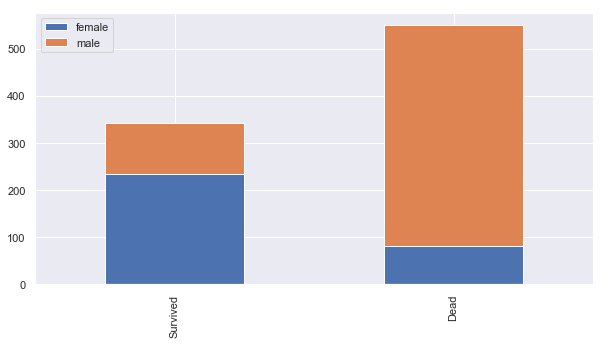

In [254]:
bar_chart('Sex')

          1   2    3
Pclass  136  87  119
Pclass   80  97  372


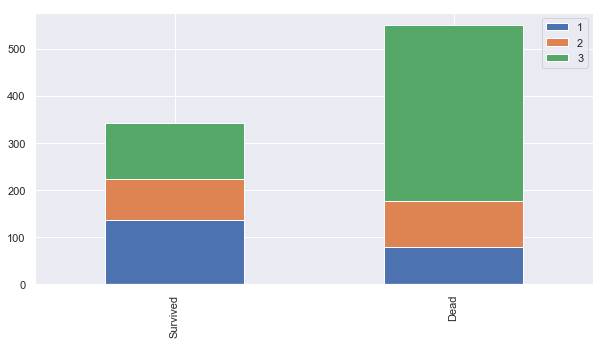

In [255]:
bar_chart('Pclass')

           0      1     2     3     4    5    8
SibSp  210.0  112.0  13.0   4.0   3.0  NaN  NaN
SibSp  398.0   97.0  15.0  12.0  15.0  5.0  7.0


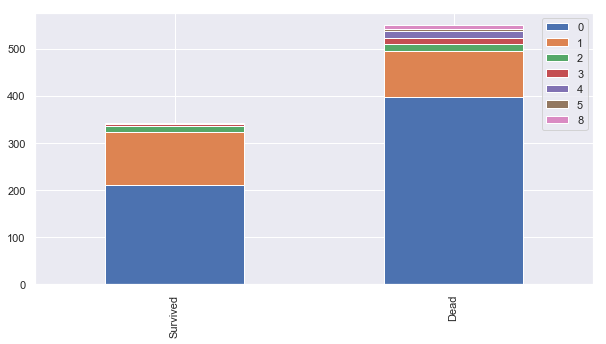

In [256]:
bar_chart('SibSp')

           0     1     2    3    4    5    6
Parch  233.0  65.0  40.0  3.0  NaN  1.0  NaN
Parch  445.0  53.0  40.0  2.0  4.0  4.0  1.0


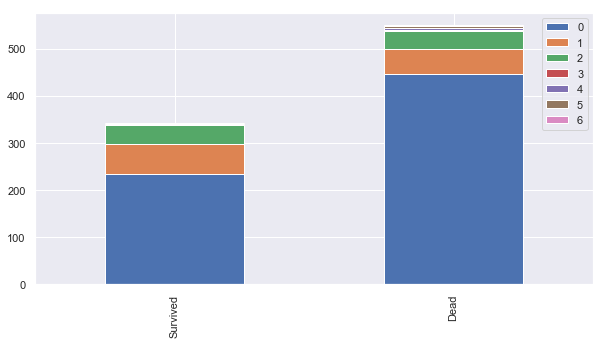

In [257]:
bar_chart('Parch')

            S   C   Q
Embarked  217  93  30
Embarked  427  75  47


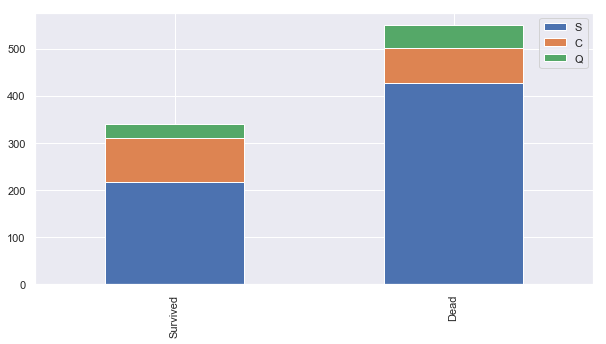

In [258]:
bar_chart('Embarked')

In [259]:
# We will use feature engineering to fill in values that were not given (e.g. NaN values in Cabin)
# We will also use it to create new features

In [260]:
len(train_test_data)

2

In [261]:
train_test_data = [train, test]

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [262]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Jonkheer      1
Ms            1
Lady          1
Don           1
Capt          1
Countess      1
Mme           1
Sir           1
Name: Title, dtype: int64

In [263]:
title_mapping = {"Mr":0, "Miss":1, "Mrs":2, "Master":3, "Dr":3, "Rev":3, "Mile":3, "Col":3, "Major":3, 
                 "Jonkheer":3, "Ms":3, "Lady":3, "Don":3, "Dona":3, "Mme":3, "Capt":3, "Countess":3, "Mme":3, "Sir":3}
for dataset in train_test_data:
    dataset["Title"] = dataset["Title"].map(title_mapping)

In [264]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [265]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


       0.0  1.0  2.0  3.0
Title   81  127   99   33
Title  436   55   26   32


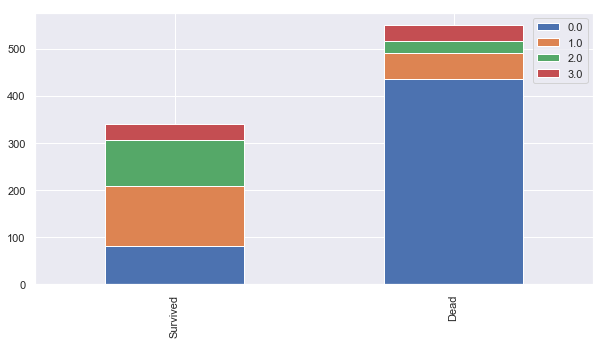

In [266]:
bar_chart("Title")

In [267]:
test.drop("Name", axis=1, inplace=True)

In [268]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


In [269]:
sex_mapping = {"male":0, "female":1}
for dataset in train_test_data:
    dataset["Sex"] = dataset["Sex"].map(sex_mapping)

In [270]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,2


       0    1
Sex  109  233
Sex  468   81


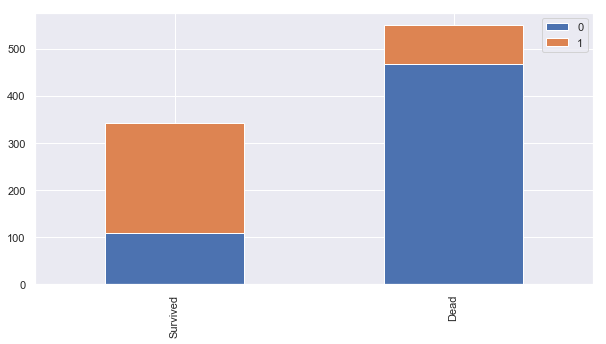

In [271]:
bar_chart("Sex")

In [272]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

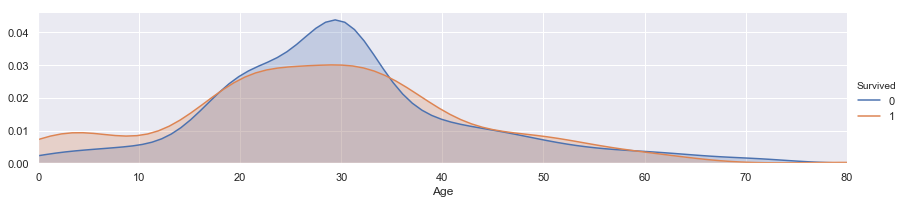

In [273]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train["Age"].max()))
facet.add_legend()

plt.show()

(0, 20)

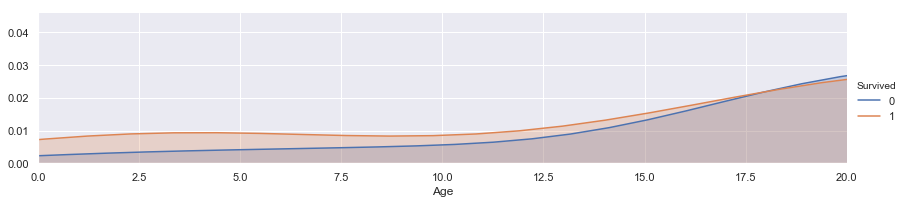

In [274]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)

In [275]:
for dataset in train_test_data:
    # Binning technique
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

     2.0  1.0  3.0  0.0  4.0
Age  116   97   69   57    3
Age  220  158  111   48   12


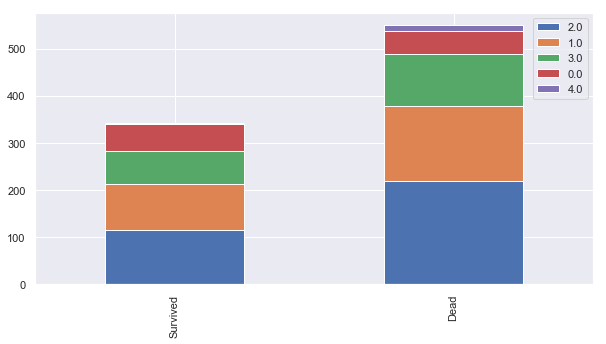

In [276]:
bar_chart("Age")

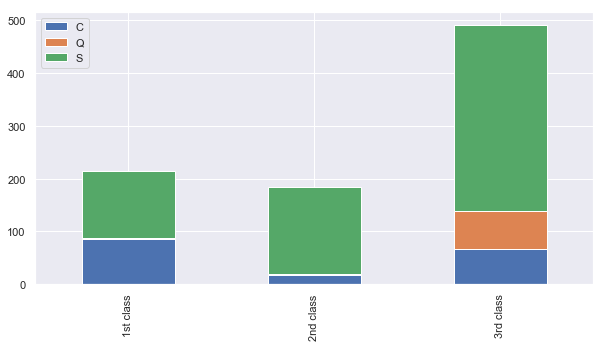

In [277]:
#Pclass1, 2, 3 are series objects within the Panda framework
Pclass1 = train[train["Pclass"]==1]["Embarked"].value_counts()
Pclass2 = train[train["Pclass"]==2]["Embarked"].value_counts()
Pclass3 = train[train["Pclass"]==3]["Embarked"].value_counts()
PclassDf = pd.DataFrame([Pclass1, Pclass2, Pclass3])
PclassDf.index = ["1st class", "2nd class", "3rd class"]
PclassDf.plot(kind="bar", stacked=True, figsize=(10,5))

In [278]:
for dataset in train_test_data:
    dataset["Embarked"] = dataset["Embarked"].fillna("S")

In [279]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,S,0.0


In [280]:
embark_map = {"S":0, "C":1, "Q":2}
for dataset in train_test_data:
    dataset["Embarked"] = dataset["Embarked"].map(embark_map)

In [281]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,1,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,0,2.0
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,0,0.0


In [282]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

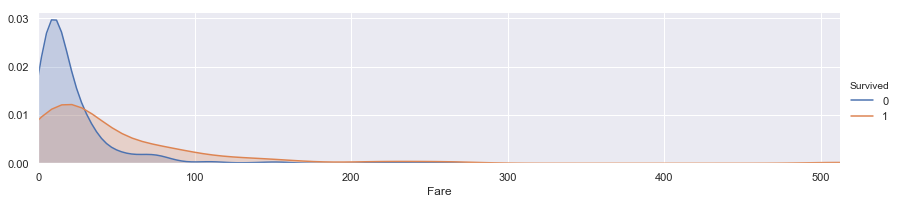

In [283]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show()

In [284]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

      0.0  1.0  2.0  3.0
Fare  132   74   97   39
Fare  364   87   84   14


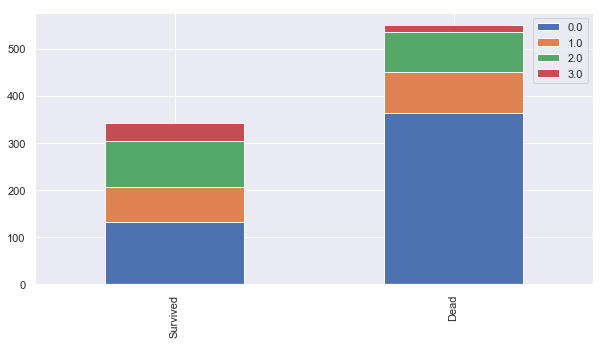

In [285]:
bar_chart("Fare")

In [286]:
train.Cabin.value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
C22 C26        3
D              3
E101           3
F33            3
F2             3
F G73          2
B58 B60        2
E44            2
B51 B53 B55    2
E24            2
E67            2
D20            2
B35            2
E25            2
C78            2
C68            2
B28            2
E33            2
C83            2
B5             2
C52            2
C124           2
C92            2
B18            2
B49            2
C65            2
D33            2
              ..
A10            1
F E69          1
B71            1
B101           1
B80            1
C101           1
D15            1
C50            1
T              1
D56            1
C128           1
E49            1
E17            1
B50            1
D49            1
D21            1
C110           1
E68            1
C148           1
B69            1
D7             1
E77            1
E38            1
C85            1
B86            1
D47            1
C32            1
C62 C64       

In [287]:
for dataset in train_test_data:
    dataset["Cabin"] = dataset["Cabin"].str[:1]

         A     B     C     D     E    F    G    T
Cabin  7.0  35.0  35.0  25.0  24.0  8.0  2.0  NaN
Cabin  8.0  12.0  24.0   8.0   8.0  5.0  2.0  1.0


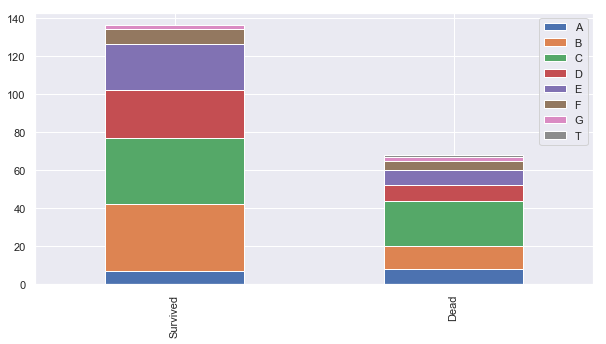

In [288]:
bar_chart("Cabin")

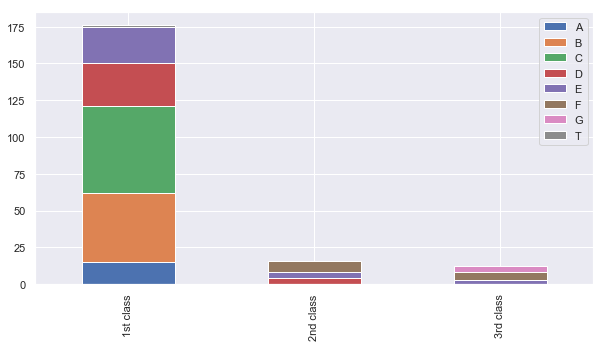

In [289]:
Pclass1 = train[train["Pclass"]==1]["Cabin"].value_counts()
Pclass2 = train[train["Pclass"]==2]["Cabin"].value_counts()
Pclass3 = train[train["Pclass"]==3]["Cabin"].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ["1st class", "2nd class", "3rd class"]
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [290]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [291]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [292]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0, 1.2)

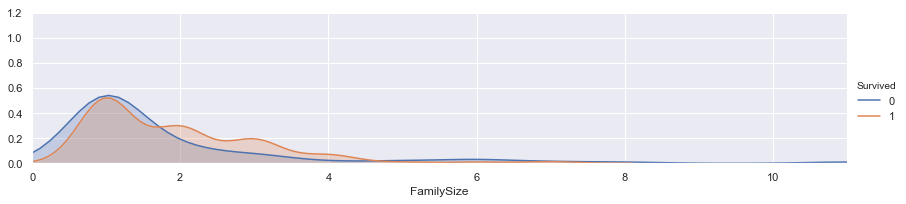

In [293]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)
plt.ylim(0, 1.2)

In [294]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [295]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,0.0,2.0,0,0.0,0.4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,2.0,0.8,1,2.0,0.4
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,2.0,0.8,0,2.0,0.4
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,0.0,2.0,0,0.0,0.0


In [296]:
features_drop = ["Ticket", "SibSp", "Parch"]
train=train.drop(features_drop, axis=1)
test=test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)